<a href="https://colab.research.google.com/github/sifiso-ncube/thesis/blob/main/SWMM_ExtrCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install pyswmm


In [9]:
from pyswmm import  Output, Simulation, Subcatchments, Links, Nodes, RainGages
from swmm.toolkit.shared_enum import LinkAttribute, SubcatchAttribute, NodeAttribute
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


**Subcatchments**

In [10]:
# Number of subcatchments
def Ex_nmbr_subcatchments():
  with Output('15.10.1realday.out') as out:
    number_of_subcmts = len(out.subcatchments)
    return number_of_subcmts

print("The number of subcatchments is: ", Ex_nmbr_subcatchments())


The number of subcatchments is:  114


In [11]:
# subcatchment area


**NODES**

In [12]:
# Number of Nodes
def Ex_nmbr_nodes():
  with Output('15.10.1realday.out') as out:
    number_of_nodes = len(out.nodes)
    return number_of_nodes

print("The number of nodes is: ", Ex_nmbr_nodes())


The number of nodes is:  167


In [13]:
# Nodes in the drainage network
# returns a dictionary of model node names with their indices as values 
def Ex_node_names():
  with Output('15.10.1realday.out') as out:
    print(out.nodes)
  
Ex_node_names()

{'N10-1': 0, 'N10-17-1': 1, 'N10-31-1': 2, 'N11-1': 3, 'N11-14-1': 4, 'N11-19-1': 5, 'N11-26-1': 6, 'N11-31-1': 7, 'N11-39-1': 8, 'N11-46': 9, 'N11-46-1': 10, 'N11-5': 11, 'N1-17': 12, 'N11-9': 13, 'N12-13-1': 14, 'N12-20-1': 15, 'N12-28': 16, 'N12-35-1': 17, 'N12-45': 18, 'N1-26-1': 19, 'N12-7': 20, 'N13-18-1': 21, 'N13-25-1': 22, 'N13-34': 23, 'N13-48': 24, 'N13-7-1': 25, 'N14-1': 26, 'N1-4-1': 27, 'N15-1': 28, 'N16-1': 29, 'N17-1': 30, 'N17-13-1': 31, 'N17-18': 32, 'N1-8': 33, 'N18-1': 34, 'N19-1': 35, 'N19-10': 36, 'N20-1': 37, 'N20-33': 38, 'N2-1': 39, 'N21-1': 40, 'N21-10': 41, 'N21-11-1': 42, 'N21-15-1': 43, 'N21-19': 44, 'N21-24': 45, 'N21-5-1': 46, 'N22-1': 47, 'N23-1': 48, 'N24-1': 49, 'N25-1': 50, 'N26-6': 51, 'N27-15': 52, 'N27-30': 53, 'N28-1': 54, 'N29-1': 55, 'N30-1': 56, 'N30-5': 57, 'N3-1': 58, 'N31-1': 59, 'N31-15-1': 60, 'N31-17-1': 61, 'N31-22-1': 62, 'N31-32-1': 63, 'N31-48': 64, 'N32-1': 65, 'N33-1': 66, 'N34-1': 67, 'N34-11-1': 68, 'N35-1': 69, 'N36-1': 70, 'N36-

**Node Attributes**
-For all nodes at given time, get a particular attribute.
-returns a dictionary of attribute values for all nodes at given timestep

In [14]:
#Invert Depth
#For all nodes at given time, get the invert depth.
def Ex_invert_depth():
  with Output('15.10.1realday.out') as out:
      data = out.node_attribute(NodeAttribute.INVERT_DEPTH, datetime(2020, 10, 15, 21))
      index_list= []
      node_invdepth = []
      for object in data:
         if data[object]>0:
            node_invdepth.append(data[object])       #data[object] gives the invert depth
            index_list.append(object)                #the object is the node name 
         else:
            pass       
         print(object, data[object])
 ##no need to plot, make a table
      
Ex_invert_depth()

N10-1 0.6357368230819702
N10-17-1 0.517257034778595
N10-31-1 0.4187828600406647
N11-1 1.6193567514419556
N11-14-1 1.6330652236938477
N11-19-1 1.5481512546539307
N11-26-1 1.1410713195800781
N11-31-1 1.2322205305099487
N11-39-1 0.551197350025177
N11-46 0.4492943584918976
N11-46-1 0.6198437809944153
N11-5 1.722176432609558
N1-17 0.8675881028175354
N11-9 1.627111792564392
N12-13-1 1.47820246219635
N12-20-1 1.7035032510757446
N12-28 1.3029578924179077
N12-35-1 0.9615005850791931
N12-45 0.5726160407066345
N1-26-1 1.0606882572174072
N12-7 1.637718915939331
N13-18-1 0.6131214499473572
N13-25-1 0.5809503197669983
N13-34 0.03362239524722099
N13-48 0.798453152179718
N13-7-1 0.7142218351364136
N14-1 0.5022497773170471
N1-4-1 0.5380771160125732
N15-1 1.1590611934661865
N16-1 1.0065559148788452
N17-1 0.9953314661979675
N17-13-1 0.9095874428749084
N17-18 0.9316240549087524
N1-8 0.8910964131355286
N18-1 1.1336928606033325
N19-1 1.4584647417068481
N19-10 1.4300620555877686
N20-1 0.8083459734916687
N20-

These nodes are not flooded ['N10-17-1', 'N10-31-1', 'N11-39-1', 'N11-46', 'N11-46-1', 'N1-17', 'N12-45', 'N1-26-1', 'N13-25-1', 'N13-34', 'N13-48', 'N1-4-1', 'N1-8', 'N3-1', 'N36-1', 'N36-12', 'N36-16-1', 'N36-20-1', 'N36-29', 'N36-38-1', 'N36-6', 'N37-12', 'N38-11', 'N38-1-1', 'N38-18', 'N38-29', 'N38-43', 'N38-49', 'N39-1', 'N39-12', 'N39-7', 'N40-1', 'N41-1', 'N43-14', 'N43-27-1', 'N43-4', 'N45-1', 'N46-1', 'N46-15', 'N46-7', 'N47-10', 'N48-10-1', 'N48-11', 'N48-12-1', 'N48-4', 'N49-1', 'N49-18', 'N49-9-1', 'N50-10', 'N52-11', 'N54-10-1', 'N54-25-1', 'N54-27-1', 'N54-38', 'N54-4', 'N55-1', 'N56-1', 'N57-1', 'N58-1', 'N59-1', 'N59-12', 'N59-21-1', 'N59-28', 'N59-31', 'N59-39', 'N59-43-1', 'N59-47-1', 'N59-5-1', 'N59-8', 'N60-1', 'N60-4', 'N62-1', 'N63-1', 'N64-1', 'N64-22', 'N64-30', 'N65-1', 'N65-32', 'N66-1', 'N66-3-1', 'N66-6', 'N66-8-1', 'N67-1', 'N68-8', 'N7-1', 'N8-21', 'N8-49-1', 'N8-67', 'N8-82', 'N8-96', 'N8-98-1', 'N1-30', 'N36-45', 'N66-12', 'N9-4']


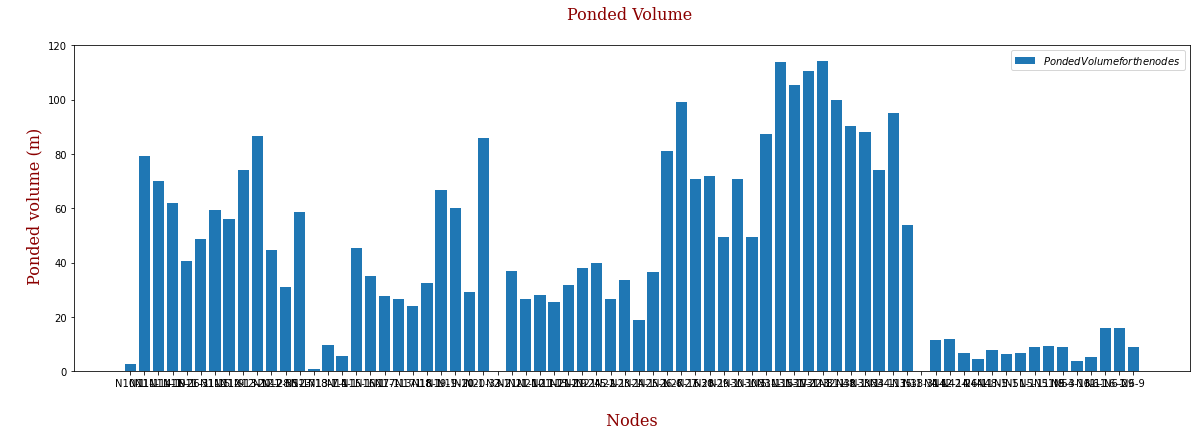

In [15]:
#Ponded Volume
#For all nodes at given time, get the ponded volume.
#returns a dictionary of attribute values for all nodes at given timestep
def Ex_ponded_volume():
  with Output('15.10.1realday.out') as out:
      data = out.node_attribute(NodeAttribute.PONDED_VOLUME, datetime(2020, 10, 15, 21))
      node_pondvol = []
      index_list= []
      non_ponded= []
      for object in data:
         if data[object]>0:                         # only those nodes which are flooded/ponded
            node_pondvol.append(data[object])       #data[object] gives the ponded volume
            index_list.append(object)                #the object is the node name 
         else:
            non_ponded.append(object)       
         #print(object, data[object])
      print("These nodes are not flooded", non_ponded)

      
      font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
      plt.figure(figsize = [20, 6])
      plt.bar(index_list, node_pondvol, label = '$Ponded Volume for the nodes $')
      plt.xlabel("\n Nodes ",fontdict = font)
      plt.ylabel("\n Ponded volume (m)",fontdict = font)
      plt.title("Ponded Volume \n",fontdict = font)
      #plt.xticks(nodes, rotation ='vertical')
      plt.legend()
      plt.show()


Ex_ponded_volume()

In [16]:
# Node Attributes
#Gets all the attributes for a node at given time.
#returns a dictionary of attributes for a node at given timestep

def Ex_node_attributes():
  with Output('15.10.1realday.out') as out:
      data = out.node_result('N33-1', datetime(2020, 10, 15, 21))
      index_list= []
      node_attr = []
      for object in data:
         node_attr.append(data[object])       #data[object] gives the value
         index_list.append(object)                #the object is the node attribute      
         print(object, data[object])
 ## make a table
      
Ex_node_attributes()



NodeAttribute.INVERT_DEPTH 1.9904381036758423
NodeAttribute.HYDRAULIC_HEAD 7.890438079833984
NodeAttribute.PONDED_VOLUME 88.07256317138672
NodeAttribute.LATERAL_INFLOW 0.01909923367202282
NodeAttribute.TOTAL_INFLOW 0.01909923367202282
NodeAttribute.FLOODING_LOSSES 0.0


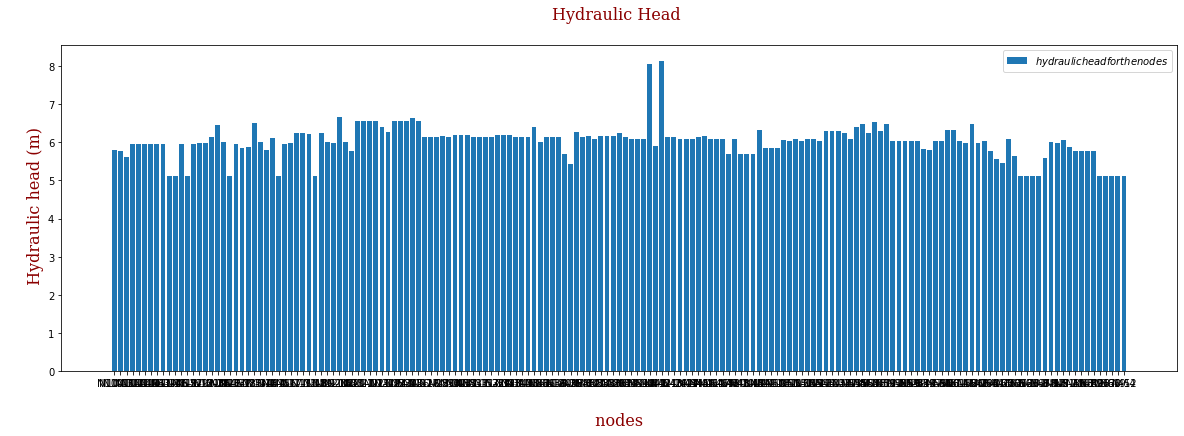

In [17]:
#Hydraulic Head  (not sure we need this)
#For all nodes at given time, get the Hydraulic head.
#returns a dictionary of attribute values for all nodes at given timestep
def Ex_hydraulic_head():
  with Output('15.10.1realday.out') as out:
      data = out.node_attribute(NodeAttribute.HYDRAULIC_HEAD, datetime(2020, 10, 16, 21))
      node_hydhead = []
      index_list= []
      for object in data:
         if data[object]>0:
            node_hydhead.append(data[object])       #data[object] gives the hydraulic head
            index_list.append(object)                #the object is the node name 
         else:
            pass       
         #print(object, data[object])

      
      font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
      plt.figure(figsize = [20, 6])
      plt.bar(index_list, node_hydhead, label = '$hydraulic head for the nodes $')
      plt.xlabel("\n nodes ",fontdict = font)
      plt.ylabel("\n Hydraulic head (m)",fontdict = font)
      plt.title("Hydraulic Head \n",fontdict = font)
      #plt.xticks(nodes, rotation='vertical')
      plt.legend()
      plt.show()


Ex_hydraulic_head()

**Node time series results for particular attributes**

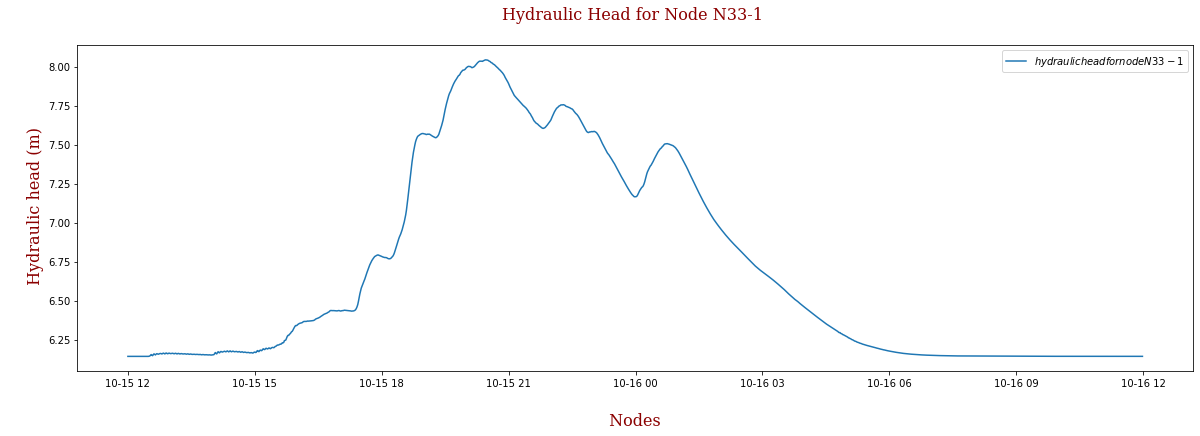

In [23]:
#Node Time series for hydraulic head. you specify the start and end time
# Returns a dictionary of attribute values with between start_index and end_index with reporting timesteps as keys
def Ex_node_hydraulic_head():
  with Output('15.10.1realday.out') as out:
      ts = out.node_series('N33-1', NodeAttribute.HYDRAULIC_HEAD, datetime(2020, 10, 15, 12), datetime(2020, 10, 16, 12))
      ts_node_hydhead = []
      index_list= []

      for index in ts:
        ts_node_hydhead.append(ts[index])     #ts[index] gives the time series value of hydraulics head at node N33-1
        index_list.append(index)                #the index is the node name
        #print(index, ts[index])
      
      font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
      plt.figure(figsize = [20, 6])
      plt.plot(index_list, ts_node_hydhead, label = '$ hydraulic head for node N33-1 $')
      plt.xlabel("\n Nodes ",fontdict = font)
      plt.ylabel("\n Hydraulic head (m)",fontdict = font)
      plt.title("Hydraulic Head for Node N33-1 \n",fontdict = font)
      #plt.xticks(nodes, rotation='vertical')
      plt.legend()
      plt.show()


Ex_node_hydraulic_head()

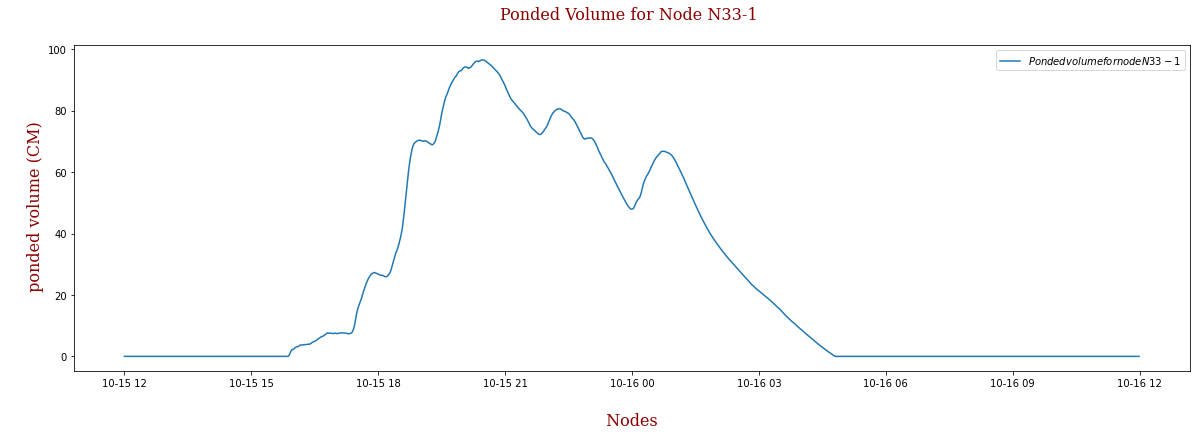

In [24]:
#Node Time series for ponded volume. you specify the start and end time
# Returns a dictionary of attribute values with between start_index and end_index with reporting timesteps as keys
def Ex_node_pondedvol():
  with Output('15.10.1realday.out') as out:
      ts = out.node_series('N33-1', NodeAttribute.PONDED_VOLUME, datetime(2020, 10, 15, 12), datetime(2020, 10, 16, 12))
      ts_node_pondedvol = []
      index_list= []

      for index in ts:
        ts_node_pondedvol.append(ts[index])     #ts[index] gives the time series value of hydraulics head at node N33-1
        index_list.append(index)                #the index is the node name
        #print(index, ts[index])
      
      font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
      plt.figure(figsize = [20, 6])
      plt.plot(index_list, ts_node_pondedvol, label = '$ Ponded volume for node N33-1 $')
      plt.xlabel("\n Nodes ",fontdict = font)
      plt.ylabel("\n ponded volume (CM)",fontdict = font)
      plt.title("Ponded Volume for Node N33-1 \n",fontdict = font)
      #plt.xticks(nodes, rotation='vertical')
      plt.legend()
      plt.show()


Ex_node_pondedvol()

**LINKS**

In [18]:
# Number of Pipes/ links
def Ex_nmbr_links():
  with Output('15.10.1realday.out') as out:
    number_of_links = len(out.links)
    return number_of_links

print("The number of links is: ", Ex_nmbr_links())

The number of links is:  175


In [19]:
# Links in the drainage network
# returns a dictionary of model link names with their indices as values 
def Ex_link_names():
  with Output('15.10.1realday.out') as out:
    print(out.links)
  
Ex_link_names()


{'CDB': 0, 'CDQD': 1, 'CQD': 2, 'LN1-0': 3, 'LN10-1': 4, 'LN10-2': 5, 'LN10-3': 6, 'LN1-1': 7, 'LN11-2': 8, 'LN11-3': 9, 'LN11-4': 10, 'LN11-5': 11, 'LN11-6': 12, 'LN11-7': 13, 'LN11-8': 14, 'LN11-9': 15, 'LN1-2': 16, 'LN12-0': 17, 'LN12-1': 18, 'LN12-2': 19, 'LN12-3': 20, 'LN12-4': 21, 'LN12-5': 22, 'LN1-3': 23, 'LN13-0': 24, 'LN13-1': 25, 'LN13-2': 26, 'LN13-3': 27, 'LN13-4': 28, 'LN1-4': 29, 'LN14-1': 30, 'LN15-1': 31, 'LN16-1': 32, 'LN17-1': 33, 'LN17-2': 34, 'LN17-3': 35, 'LN18-1': 36, 'LN19-1': 37, 'LN19-2': 38, 'LN20-1': 39, 'LN20-2': 40, 'LN2-1': 41, 'LN21-1': 42, 'LN21-2': 43, 'LN21-3': 44, 'LN21-4': 45, 'LN21-5': 46, 'LN21-6': 47, 'LN21-7': 48, 'LN22-1': 49, 'LN23-1': 50, 'LN24-1': 51, 'LN25-1': 52, 'LN26-0': 53, 'LN26-1': 54, 'LN27-0': 55, 'LN27-1': 56, 'LN28-1': 57, 'LN29-1': 58, 'LN30-1': 59, 'LN30-2': 60, 'LN3-1': 61, 'LN31-1': 62, 'LN31-2': 63, 'LN31-3': 64, 'LN31-4': 65, 'LN31-5': 66, 'LN31-6': 67, 'LN32-1': 68, 'LN33-1': 69, 'LN34-1': 70, 'LN34-2': 71, 'LN35-1': 72, 'L

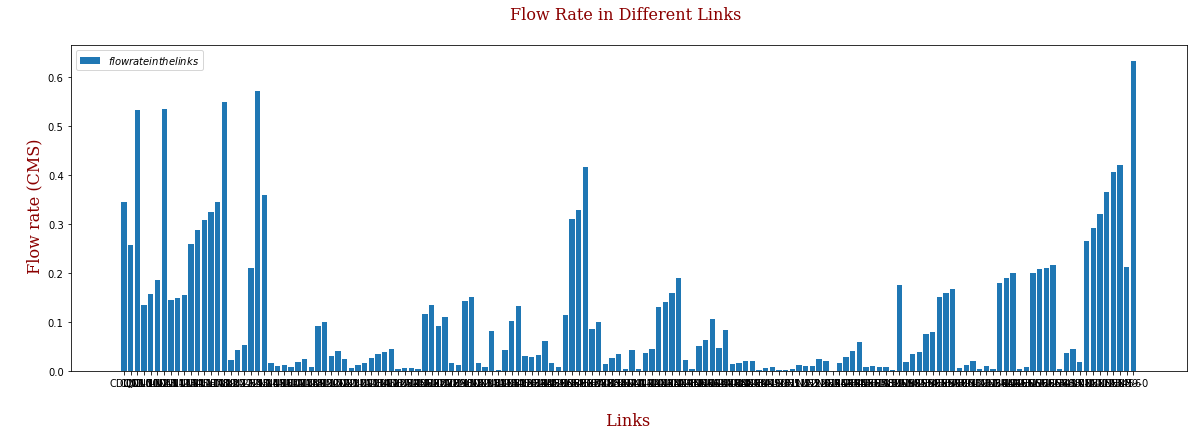

In [20]:
# Link Flow rate for all the links at a fixed time
def Ex_flrate_links():
  with Output('15.10.1realday.out') as out:
      data = out.link_attribute(LinkAttribute.FLOW_RATE, datetime(2020, 10, 15, 21))      #chose this day bcoz its among the most wet days.
      index_list= []
      linkFl = []
      for object in data:
         #print(object, data[object])
         if data[object]>0:
            linkFl.append(data[object])       #data[object] gives the  value of flowrate at a link
            index_list.append(object)           #the object is the link name 
         else:
            pass       
         
 
      font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
      plt.figure(figsize = [20, 6])
      plt.bar(index_list, linkFl, label = '$flowrate in the links $')
      plt.xlabel("\n Links ",fontdict = font)
      plt.ylabel("\n Flow rate (CMS)",fontdict = font)
      plt.title("Flow Rate in Different Links \n",fontdict = font)
      #plt.xticks(Links, rotation='vertical')
      plt.legend()
      plt.show()
      

Ex_flrate_links()


**Time series for different link attributes**

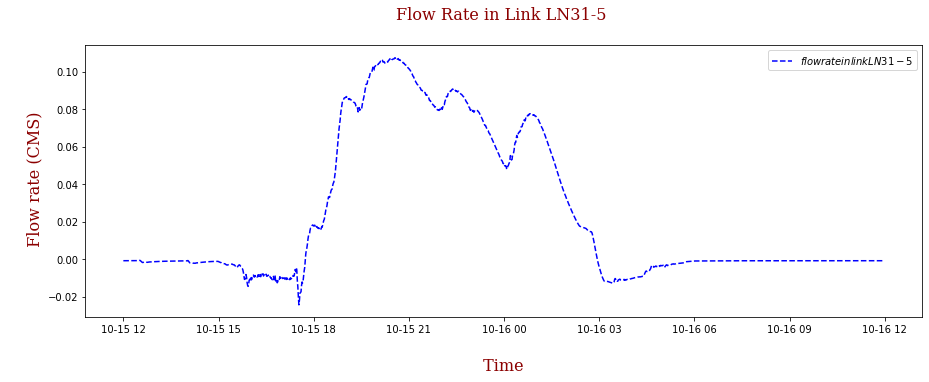

In [21]:

#Link Flowrate for one link for a period of time
def Ex_link_flowrate():
  with Output('15.10.1realday.out') as out:
     ts = out.link_series('LN31-5', LinkAttribute.FLOW_RATE, datetime(2020, 10, 15, 12), datetime(2020, 10, 16, 12))
     index_list= []
     ts_linkFl = []
     for index in ts:
       #print(index, ts[index])
       ts_linkFl.append(ts[index])     #ts[index] gives the time series value of flowrate at link LN31-5
       index_list.append(index)        #index is the datetime
       #print(ts_linkFl)

     font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
     plt.figure(figsize = [15, 5])
     plt.plot(index_list, ts_linkFl, '--b', label = '$flowrate in link LN31-5$')
     plt.xlabel("\n Time ",fontdict = font)
     plt.ylabel("\n Flow rate (CMS)",fontdict = font)
     plt.title("Flow Rate in Link LN31-5 \n",fontdict = font)
     plt.legend()
     plt.show()
      #plt.plot (ts_linkFl)


Ex_link_flowrate()


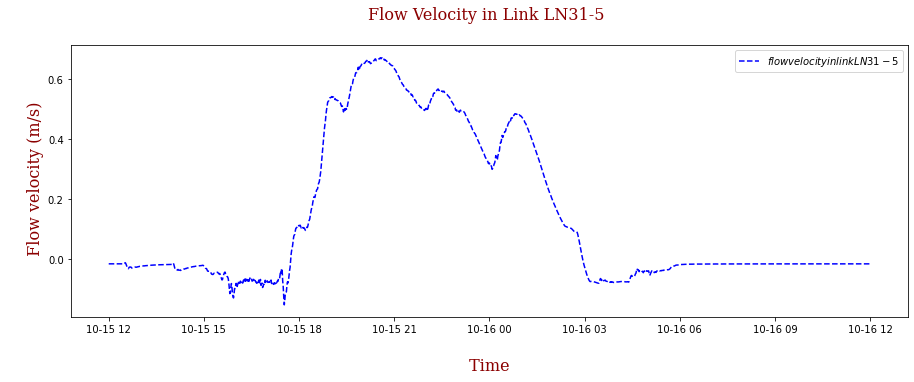

In [22]:
#Link Velocity
def Ex_link_flowvel():
  with Output('15.10.1realday.out') as out:
     ts = out.link_series('LN31-5', LinkAttribute.FLOW_VELOCITY, datetime(2020, 10, 15, 12), datetime(2020, 10, 16, 12))
     index_list= []
     ts_linkFl = []
     for index in ts:
       #print(index, ts[index])
       ts_linkFl.append(ts[index])     #ts[index] gives the time series value of flowrate at link LN31-5
       index_list.append(index)        #index is the datetime
      

     font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
     plt.figure(figsize = [15, 5])
     plt.plot(index_list, ts_linkFl, '--b', label = '$flow velocity in link LN31-5$')
     plt.xlabel("\n Time ",fontdict = font)
     plt.ylabel("\n Flow velocity (m/s)",fontdict = font)
     plt.title("Flow Velocity in Link LN31-5 \n",fontdict = font)
     plt.legend()
     plt.show()
      #plt.plot (ts_linkFl)


Ex_link_flowvel()